# Tugas Decision Tree - Breast Cancer Classification

#### Dataset = https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/

**Description** : "Dataset ini berisi pengukuran medis dari tumor payudara yang diambil dari hasil citra digitalisasi jarum halus aspirasi (FNA) dari massa payudara. Terdapat 32 variabel dalam dataset, termasuk 31 variabel fitur yang mencakup pengukuran seperti radius, tekstur, dan area, serta satu variabel target (Diagnosis) yang mengindikasikan apakah tumor tersebut jinak ('B') atau ganas ('M')."


### 1. Import Modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### 2. Data Discovery


In [2]:
df = pd.read_csv("./breast_cancer.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### Penjelasan Lebih Lanjut Tentang Variabel

1. ID number: Nomor identifikasi.
2. Diagnosis: Diagnosa (M = ganas, B = jinak).

Kemudian, ada 10 fitur nyata dihitung dari tiap-tiap inti sel pada data Breast Cancer:

1. radius: Rata-rata jarak dari pusat ke titik-titik di perimeter.
2. texture: Standar deviasi dari nilai skala abu-abu.
3. perimeter: Keliling.
4. area: Luas.
5. smoothness: Variasi lokal dalam panjang radius.
6. compactness: Tingkat kepadatan stuktur dari inti sel
7. concavity: Keparahan bagian cekung dari kontur.
8. concave points: Jumlah bagian cekung dari kontur.
9. symmetry: Simetri.
10. fractal dimension: "Aproksimasi garis pantai" - 1.


In [4]:
df.drop("Unnamed: 32", inplace=True, axis=1)

In [5]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### 3. EDA

1. Categorical data encoding
2. Correlation Matrix
3. Handling Outliers
4. Data Splitting


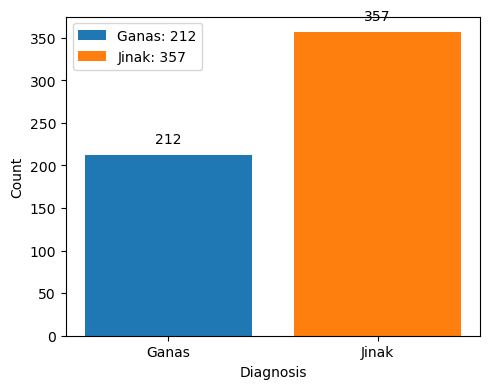

In [8]:
plt.figure(figsize=(5, 4))

# Menghitung Diagnosa nya
malignant_count = len(df[df["diagnosis"] == "M"])
benign_count = len(df[df["diagnosis"] == "B"])

# Creating the bar plots
plt.bar([0], height=malignant_count, label=f"Ganas: {malignant_count}")
plt.bar([1], height=benign_count, label=f"Jinak: {benign_count}")

# Adding the counts on top of the bars
plt.text(
    0, malignant_count + 10, str(malignant_count), ha="center", va="bottom", fontsize=10
)
plt.text(1, benign_count + 10, str(benign_count), ha="center", va="bottom", fontsize=10)

plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.xticks(np.arange(2), ("Ganas", "Jinak"))

plt.legend()
plt.tight_layout()
plt.show()

#### Categorical Data Encoding


In [9]:
# convert menjadi klasifikasi 0 dan 1
df["diagnosis"] = df["diagnosis"].map({"B": 0, "M": 1})

In [10]:
df.tail(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [11]:
# Hitung correlation matrix
correlation_matrix = df.corr()

correlation_matrix.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019


<Axes: >

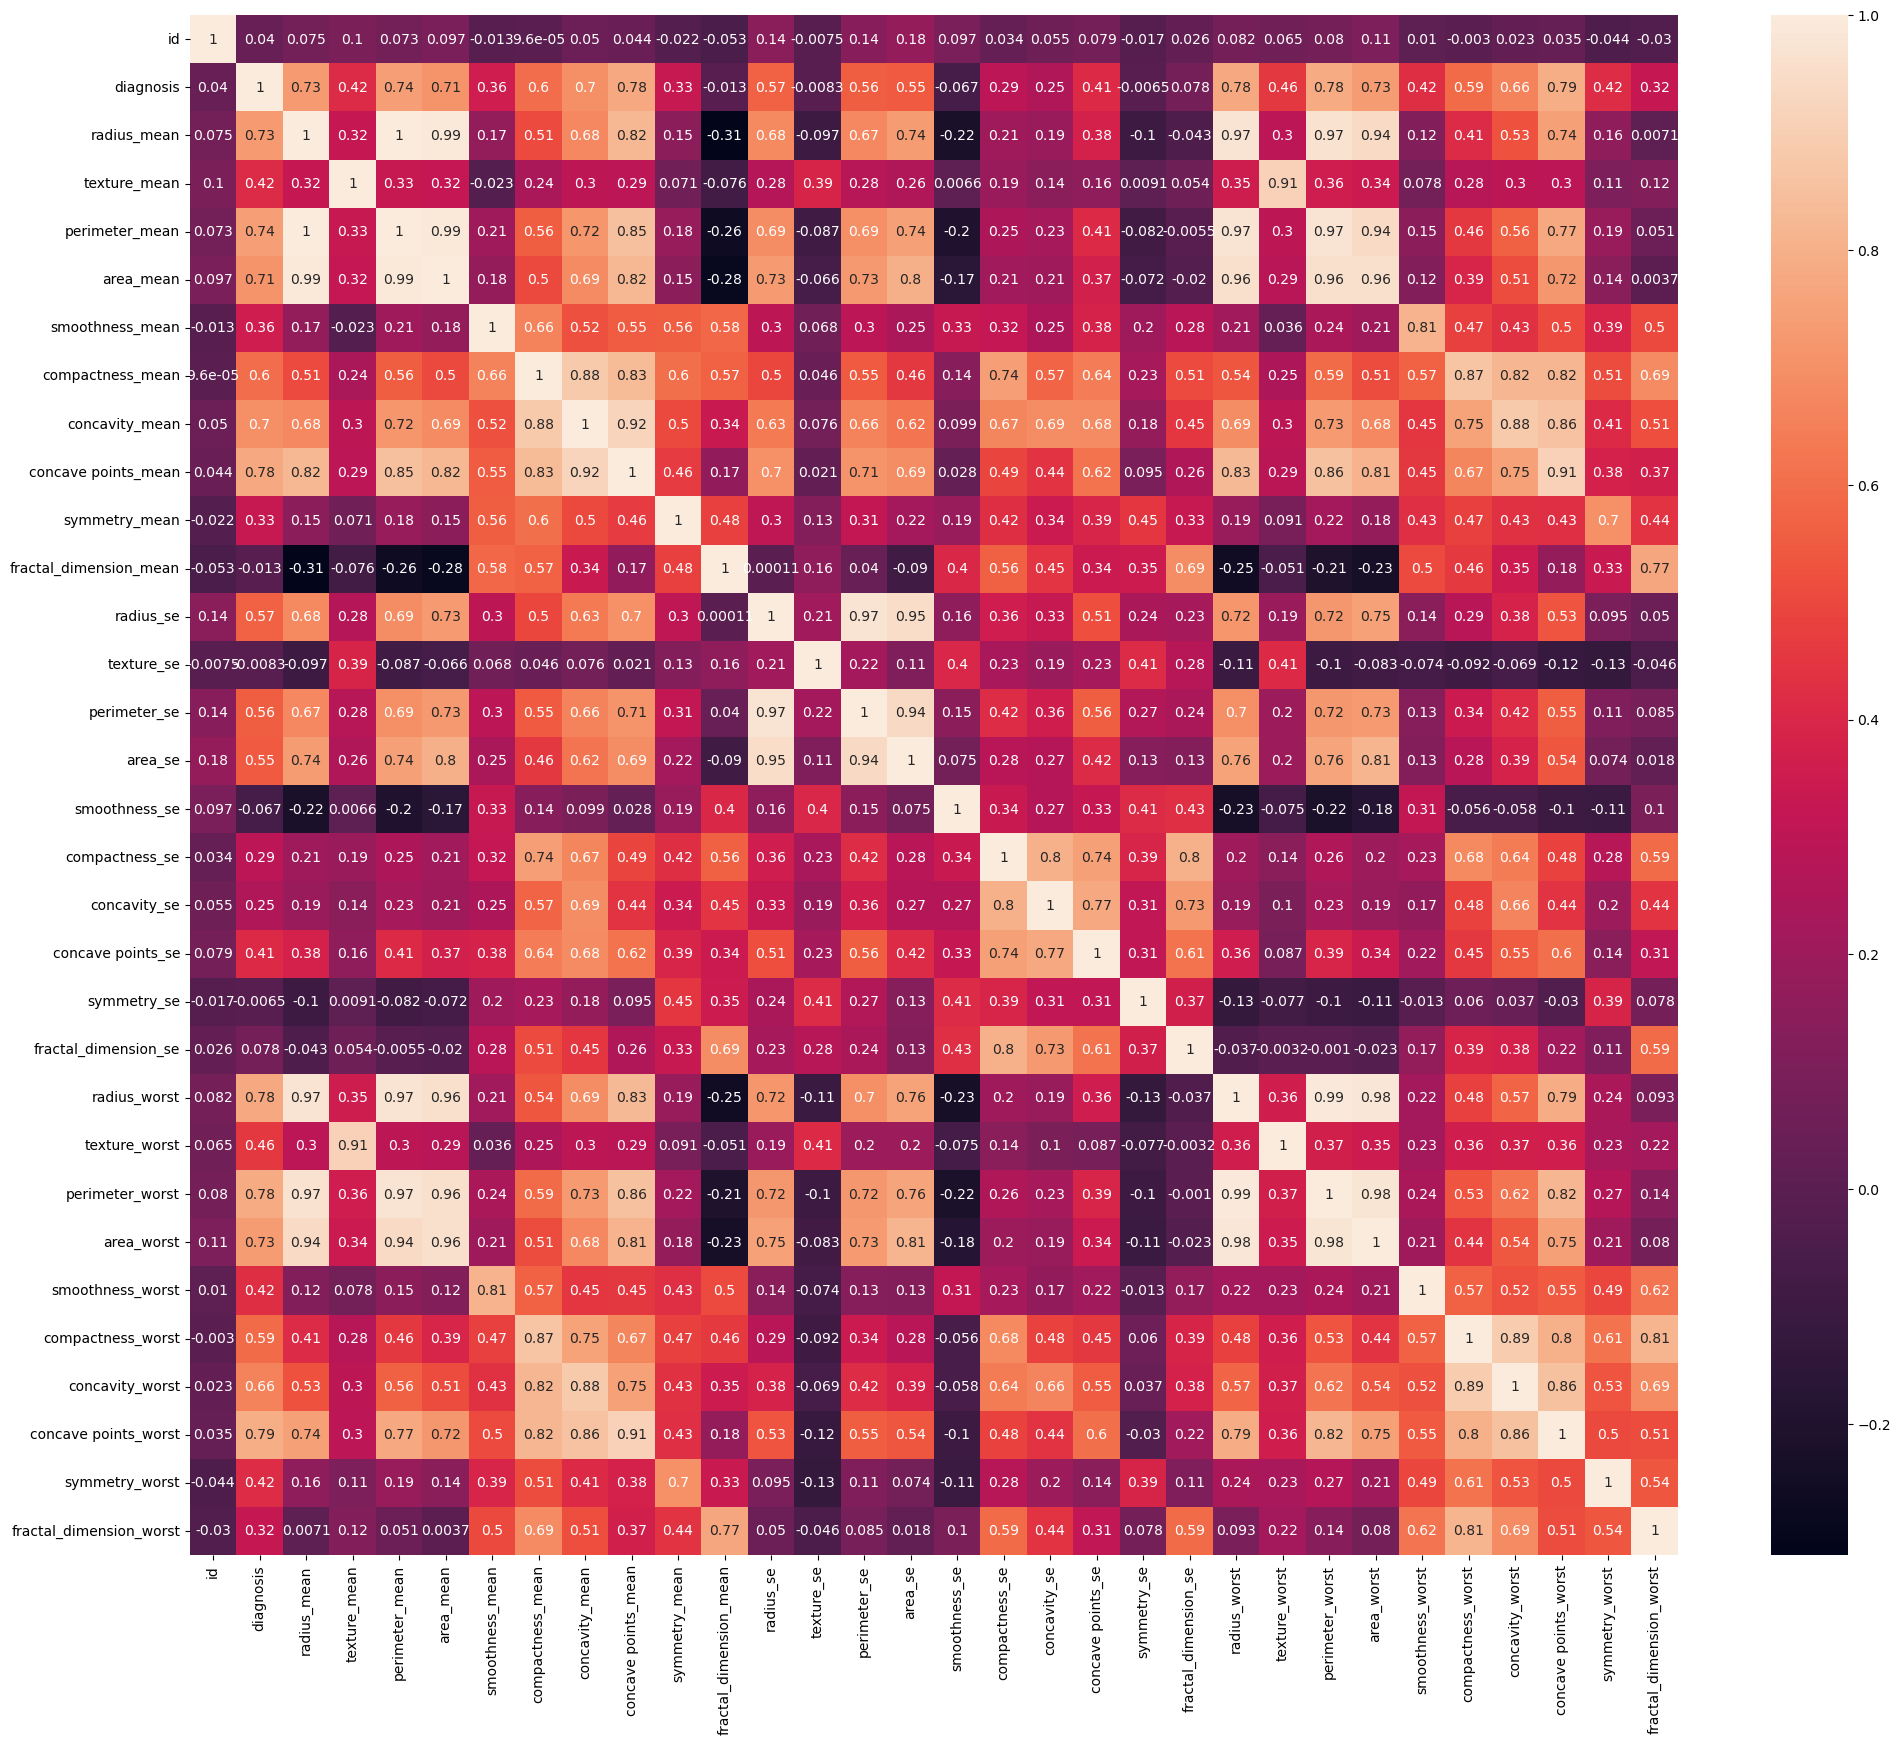

In [12]:
plt.figure(figsize=(24, 20))
cor = df.corr()
sns.heatmap(cor, annot=True)

In [13]:
# Removing Unnecessary columns
rm_unnecessary_cols = [
    "perimeter_mean",
    "area_mean",
    "concave points_mean",
    "perimeter_se",
    "area_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
]
df.drop(rm_unnecessary_cols, axis=1, inplace=True)

<Axes: >

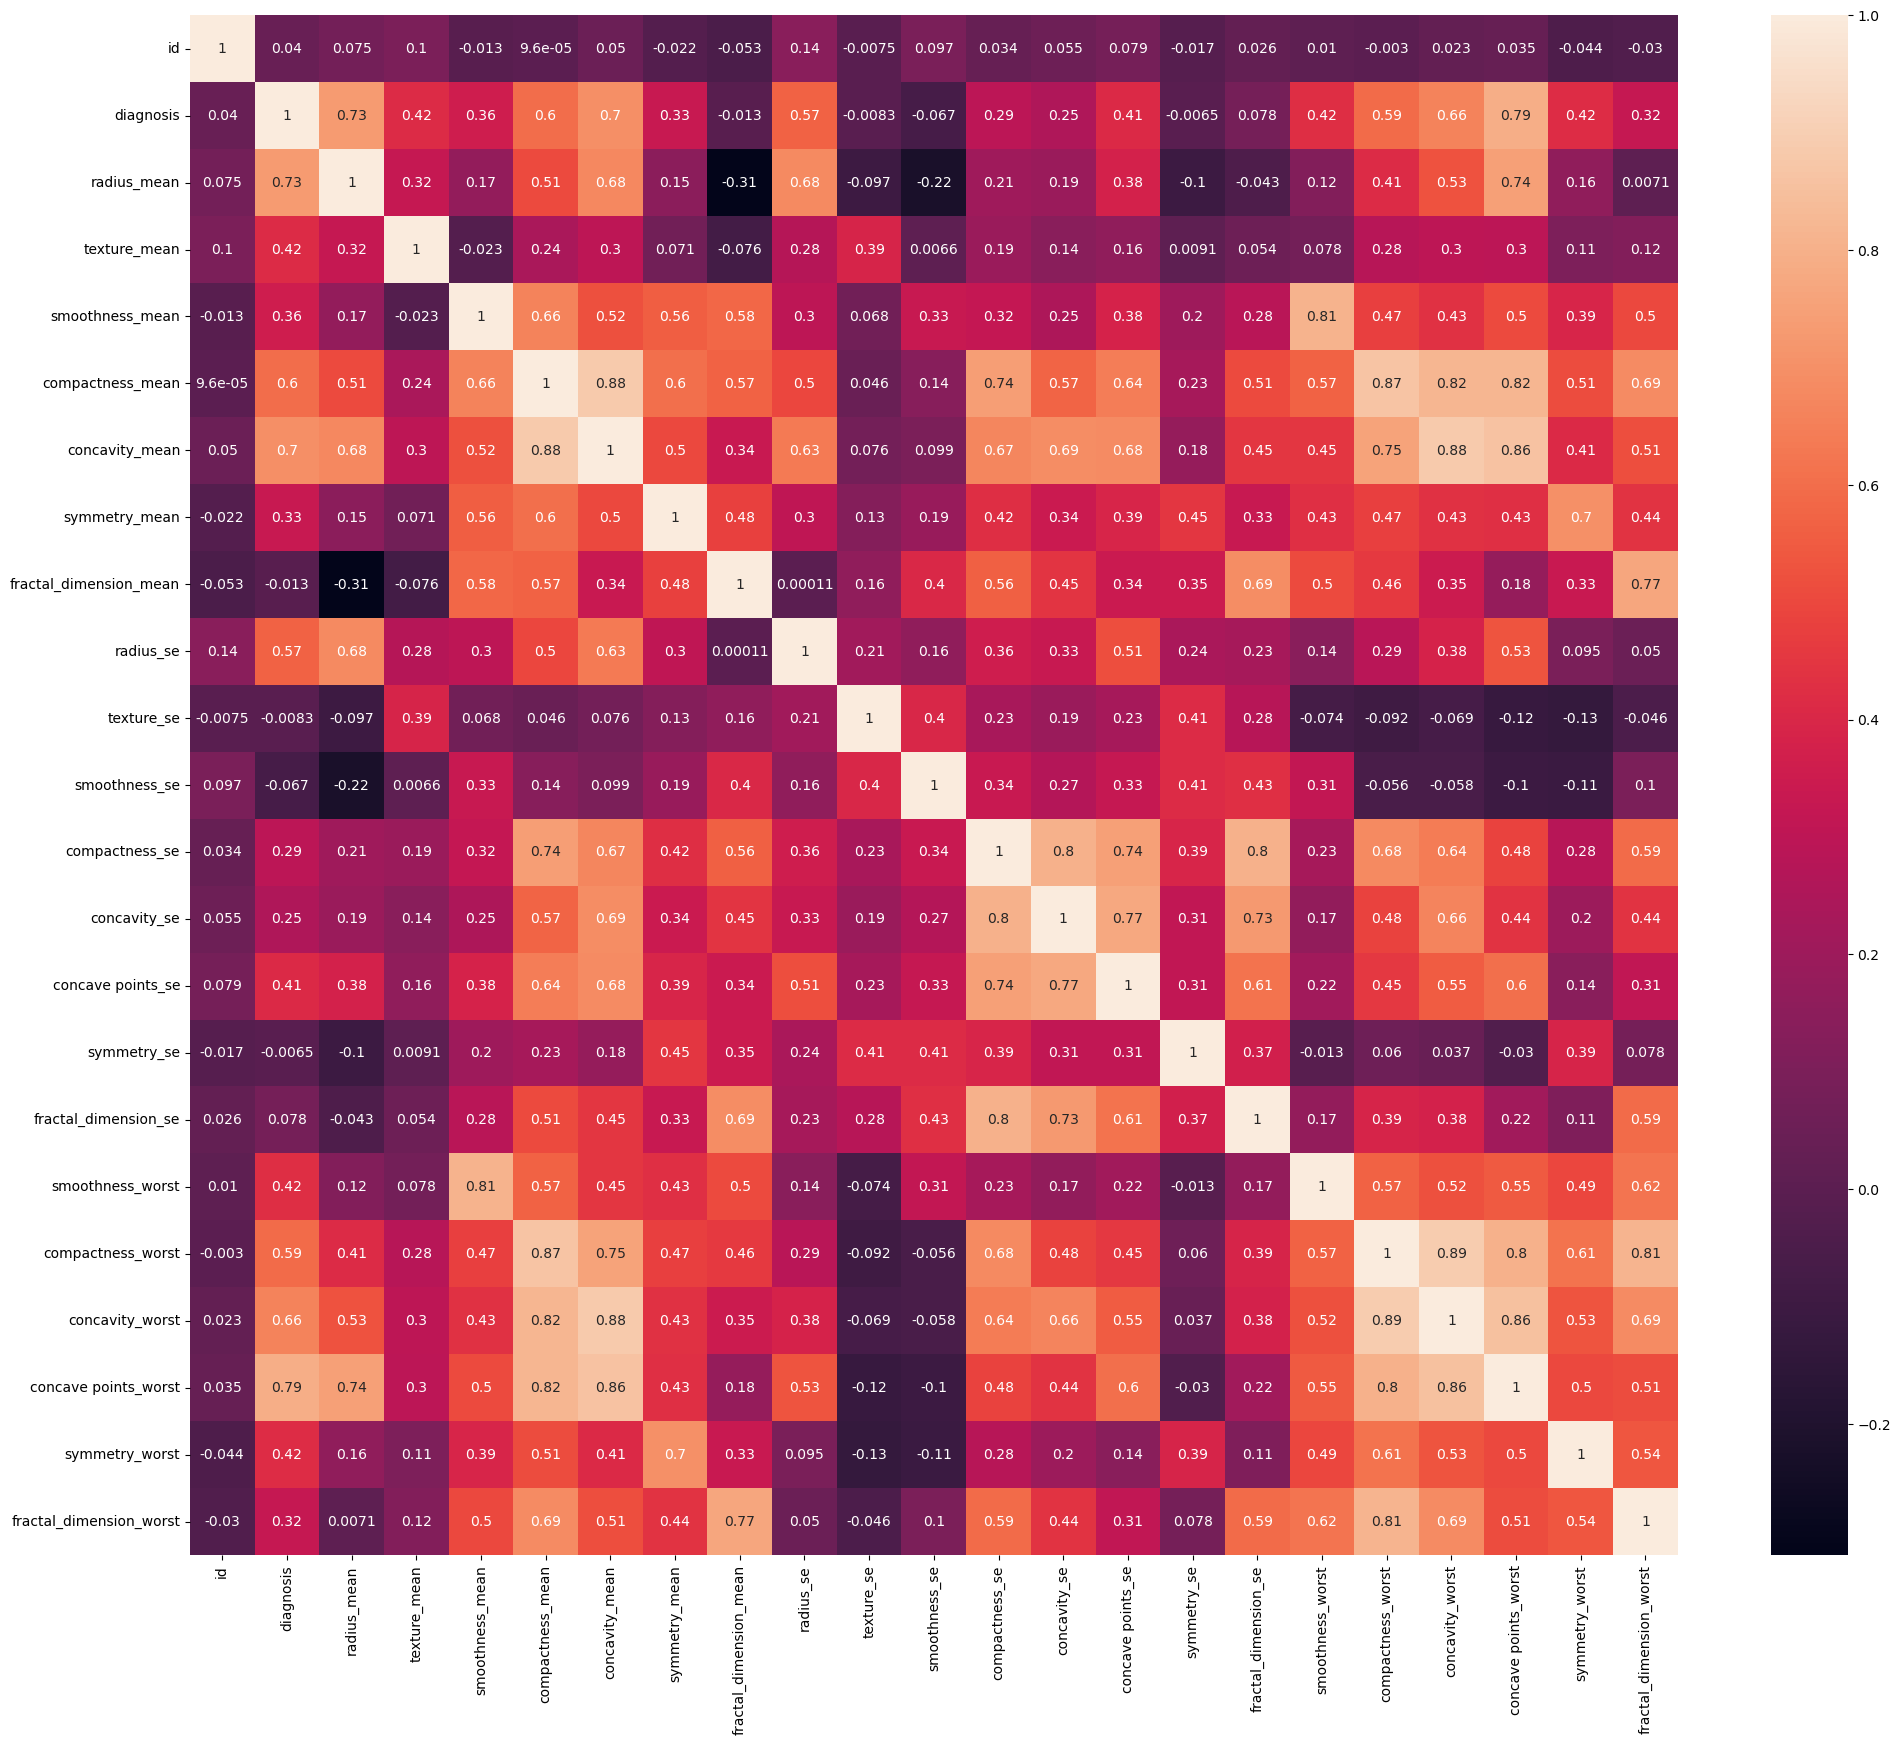

In [14]:
plt.figure(figsize=(24, 20))
cor = df.corr()
sns.heatmap(cor, annot=True)

#### Handle Outliers


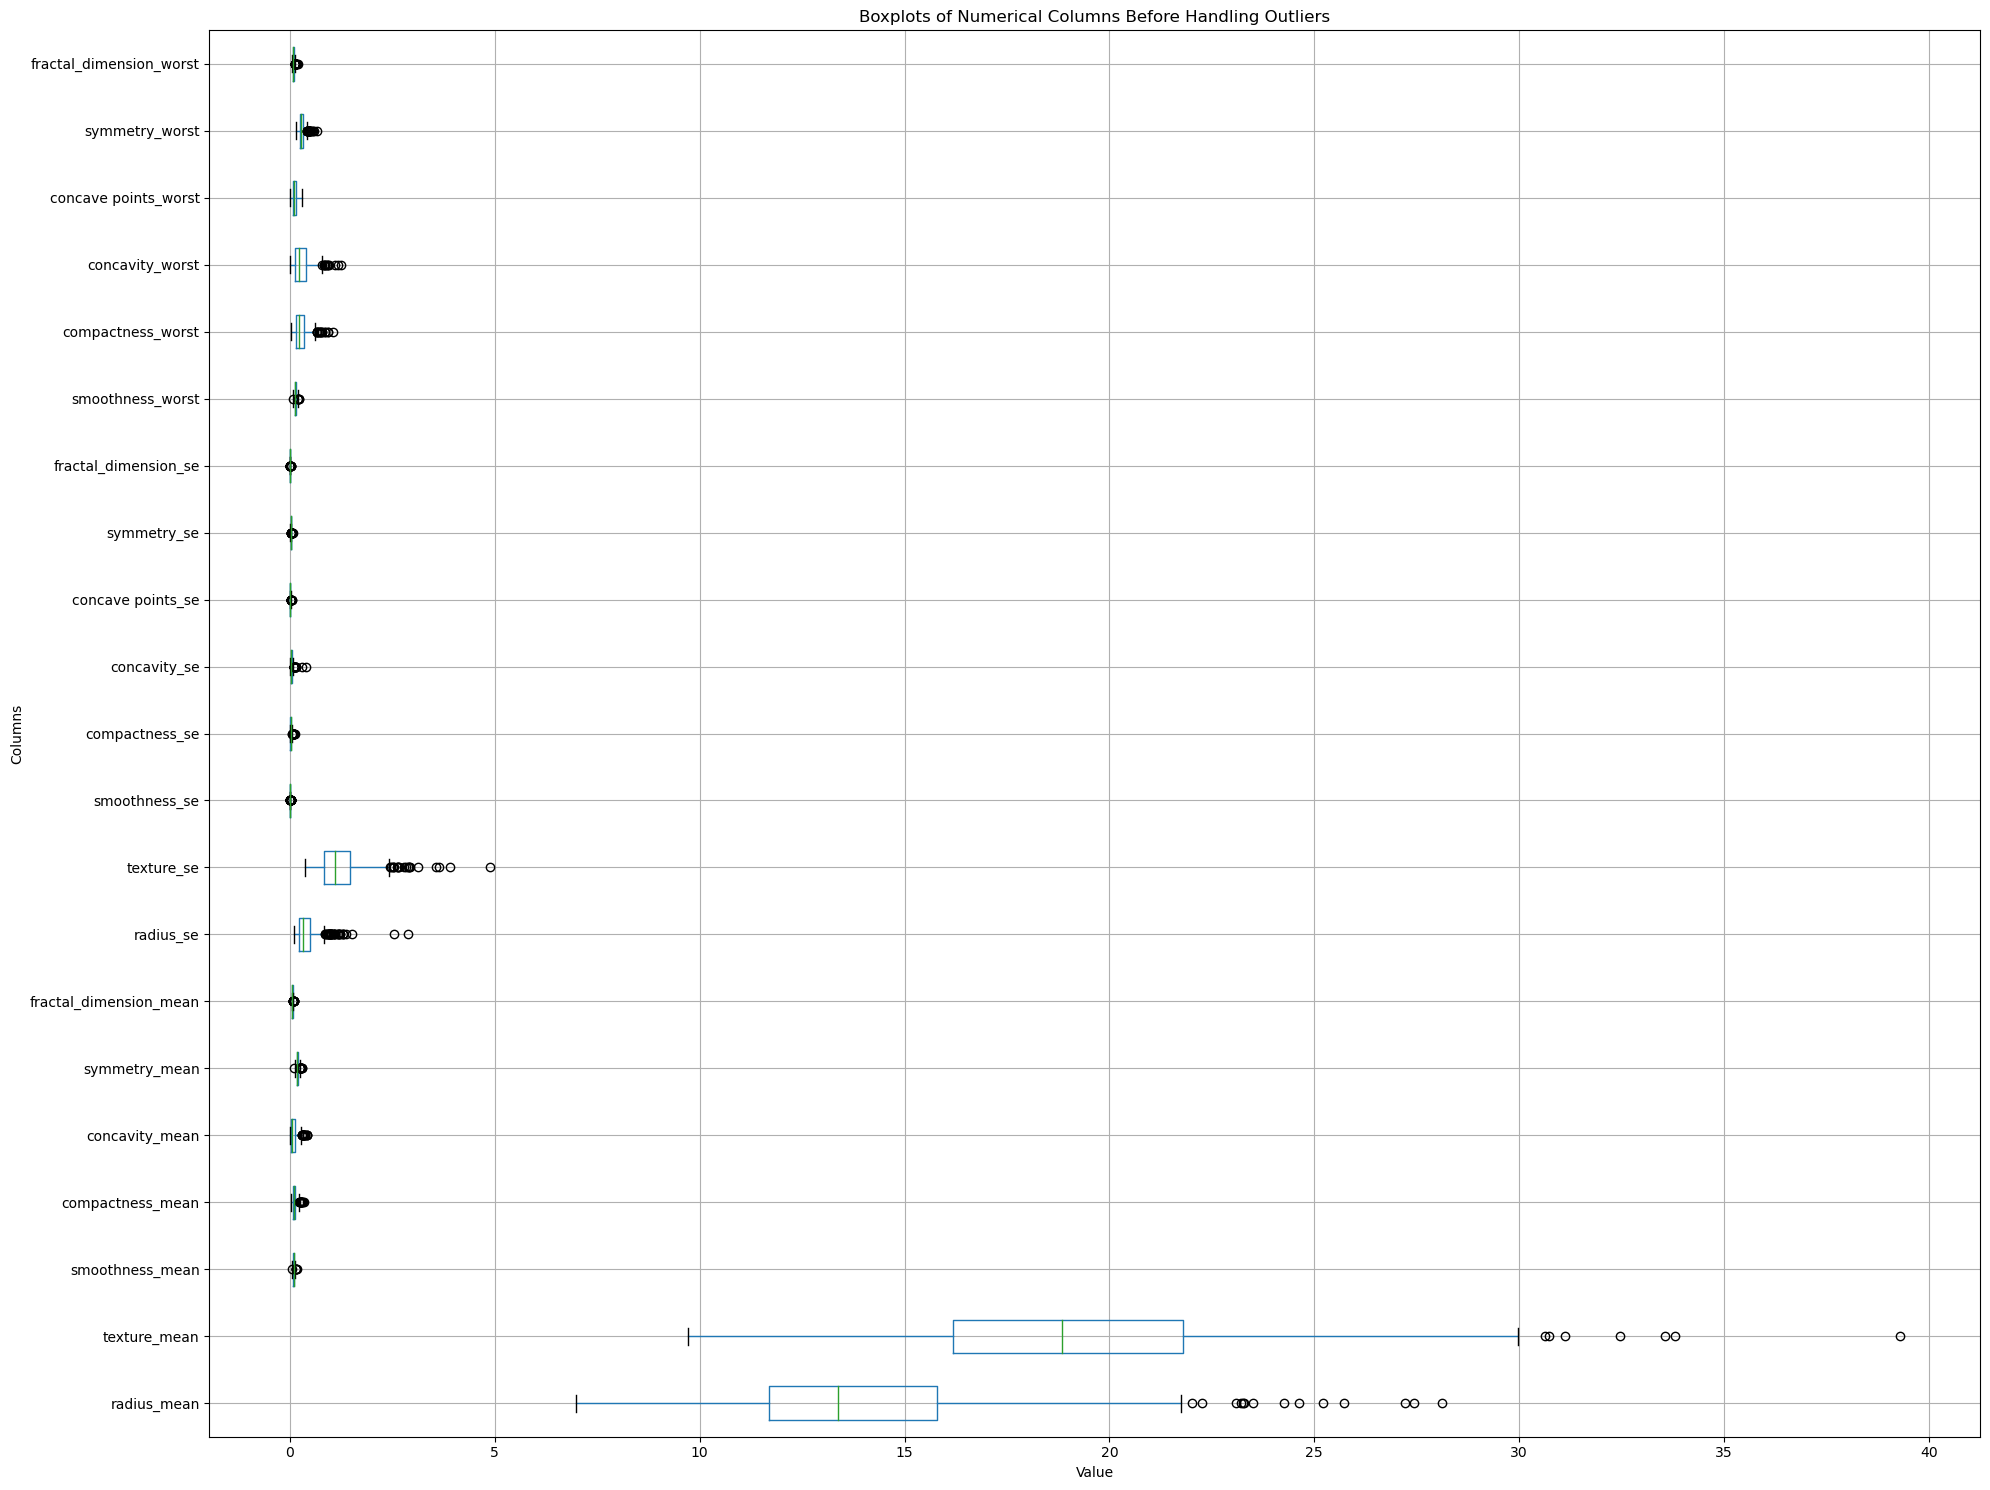

In [15]:
numerical_cols = df.select_dtypes(include=["float64"]).columns

# Plotting
plt.figure(figsize=(20, 15))
df[numerical_cols].boxplot(vert=False)
plt.title("Boxplots of Numerical Columns Before Handling Outliers")
plt.xlabel("Value")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()

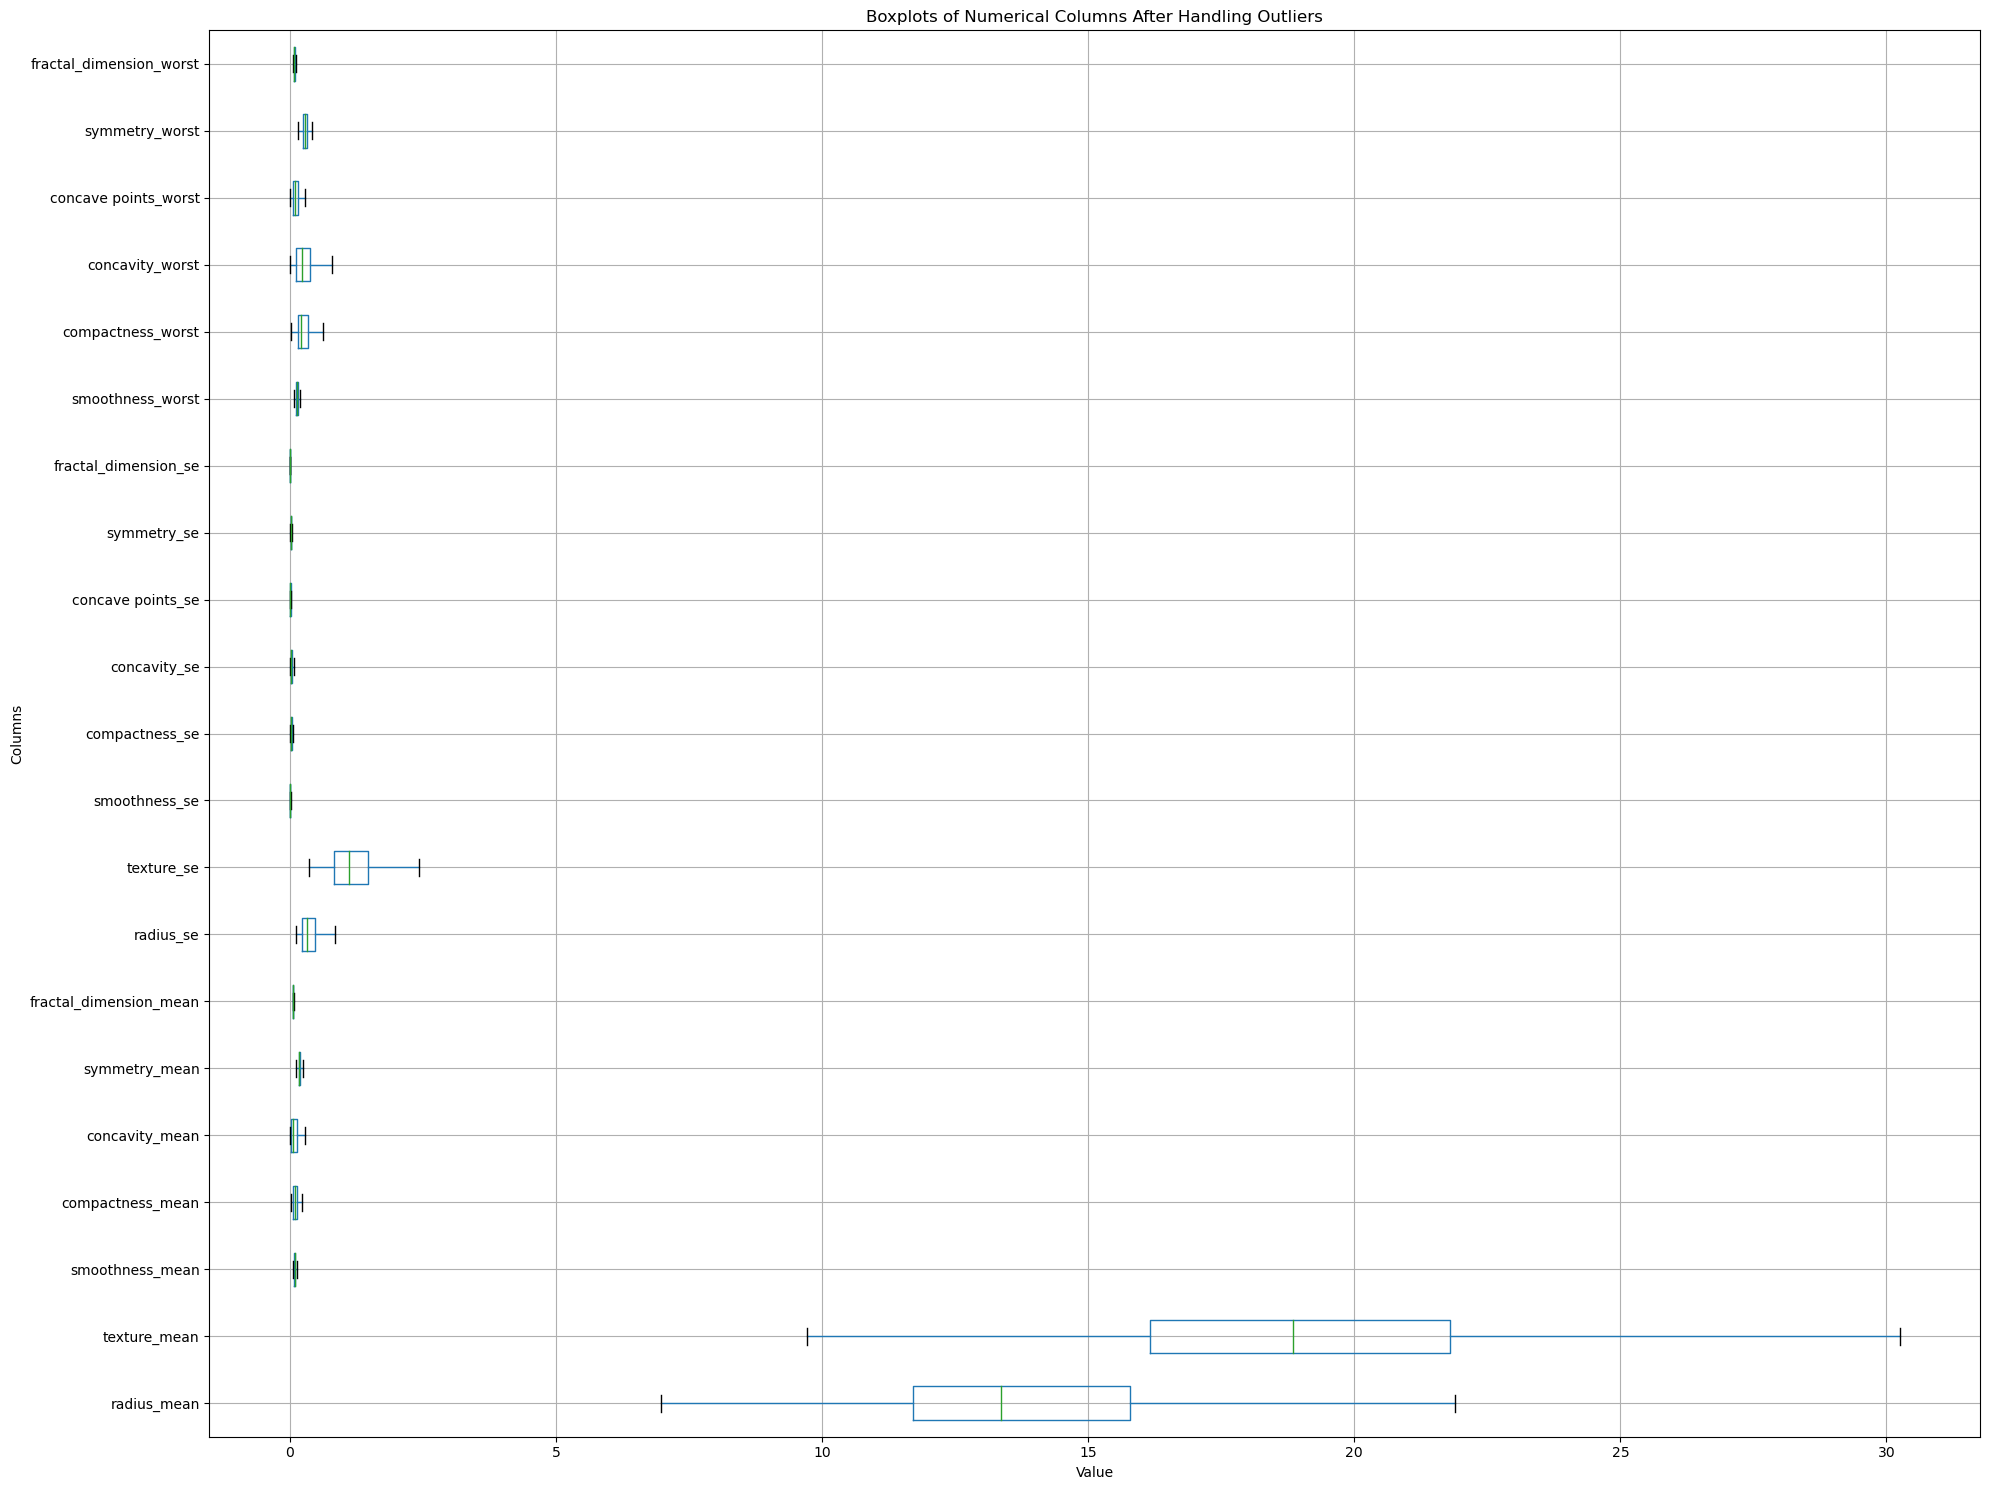

In [16]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Plotting boxplots setelah handle outliers
plt.figure(figsize=(20, 15))
df[numerical_cols].boxplot(vert=False)
plt.title("Boxplots of Numerical Columns After Handling Outliers")
plt.xlabel("Value")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()

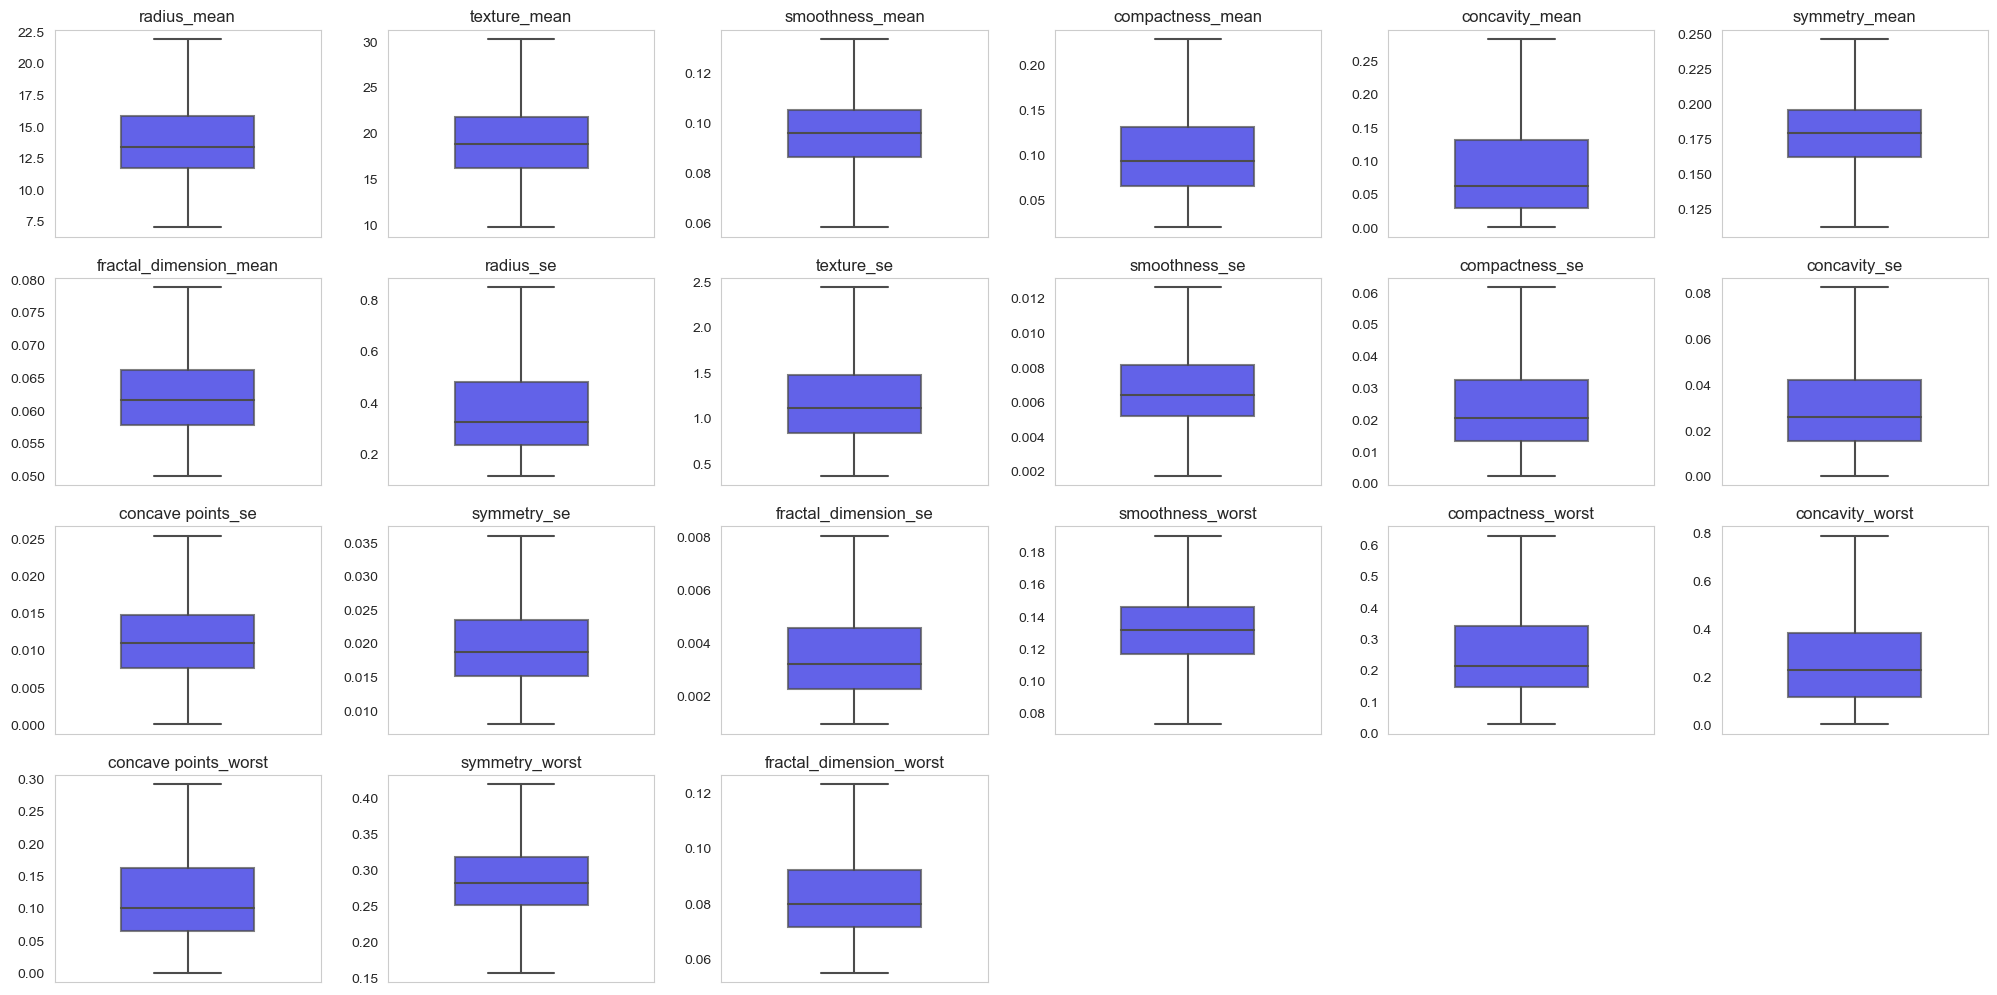

In [17]:
plt.figure(figsize=(20, 15))

sns.set_style("whitegrid")
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(
        y=df[column], color="blue", width=0.5, fliersize=5, boxprops=dict(alpha=0.7)
    )
    plt.title(column)
    plt.ylabel("")
    plt.grid(False)

plt.tight_layout()
plt.show()

#### Data Splitting


In [18]:
# Splitting data
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 22), (114, 22), (455,), (114,))

### 4. Decision Tree Modeling


In [19]:
# Pembuatan lists untuk menyimpan errors untuk training dan test set
train_err = []
test_err = []

# Maximum depth yang akan ditest
max_depths = list(range(1, 10))

for depth in max_depths:
    # Looping max_depth dari rentang 1-10
    model = DecisionTreeClassifier(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)

    # Melakukan predict training and testing sets
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Perhitungan MAE/Mean Absolute Error
    train_error = mean_absolute_error(y_train, train_predictions)
    test_error = mean_absolute_error(y_test, test_predictions)

    # Append error nya ke list
    train_err.append(train_error)
    test_err.append(test_error)

train_err, test_err

([0.07912087912087912,
  0.05714285714285714,
  0.03076923076923077,
  0.017582417582417582,
  0.006593406593406593,
  0.004395604395604396,
  0.0,
  0.0,
  0.0],
 [0.08771929824561403,
  0.06140350877192982,
  0.06140350877192982,
  0.07017543859649122,
  0.08771929824561403,
  0.07894736842105263,
  0.07894736842105263,
  0.07894736842105263,
  0.07894736842105263])

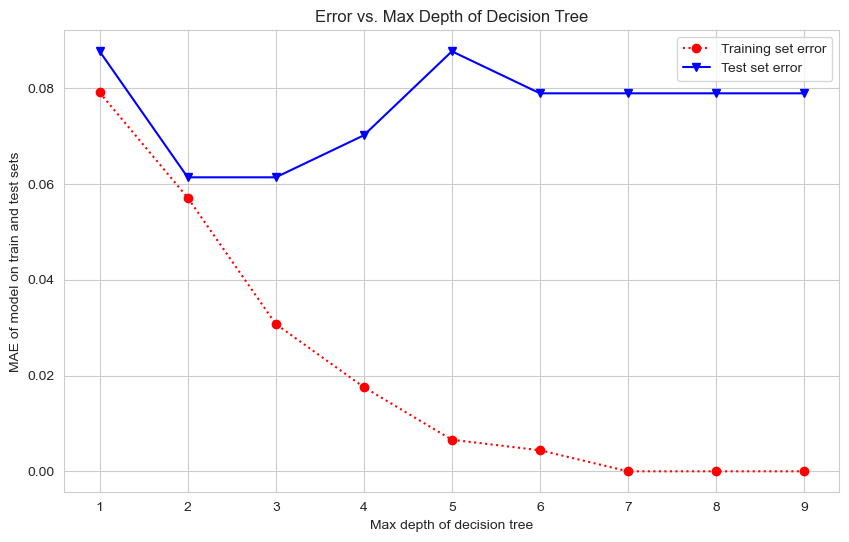

In [20]:
# Visualisasi MAE VS Max_Depth, sebuah langkah untuk melakukan model fitting
x = np.linspace(1, 9, 9)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, train_err, "o:r", label="Training set error")
ax.plot(x, test_err, "v-b", label="Test set error")
ax.set_xlabel("Max depth of decision tree")
ax.set_ylabel("MAE of model on train and test sets")
ax.set_xticks(x)
ax.legend()
plt.title("Error vs. Max Depth of Decision Tree")
plt.show()

Dari hasil perhtiungan tersebut, didapatkan angka **max-depth 2/3** agar model ML tidak underfit/overfit


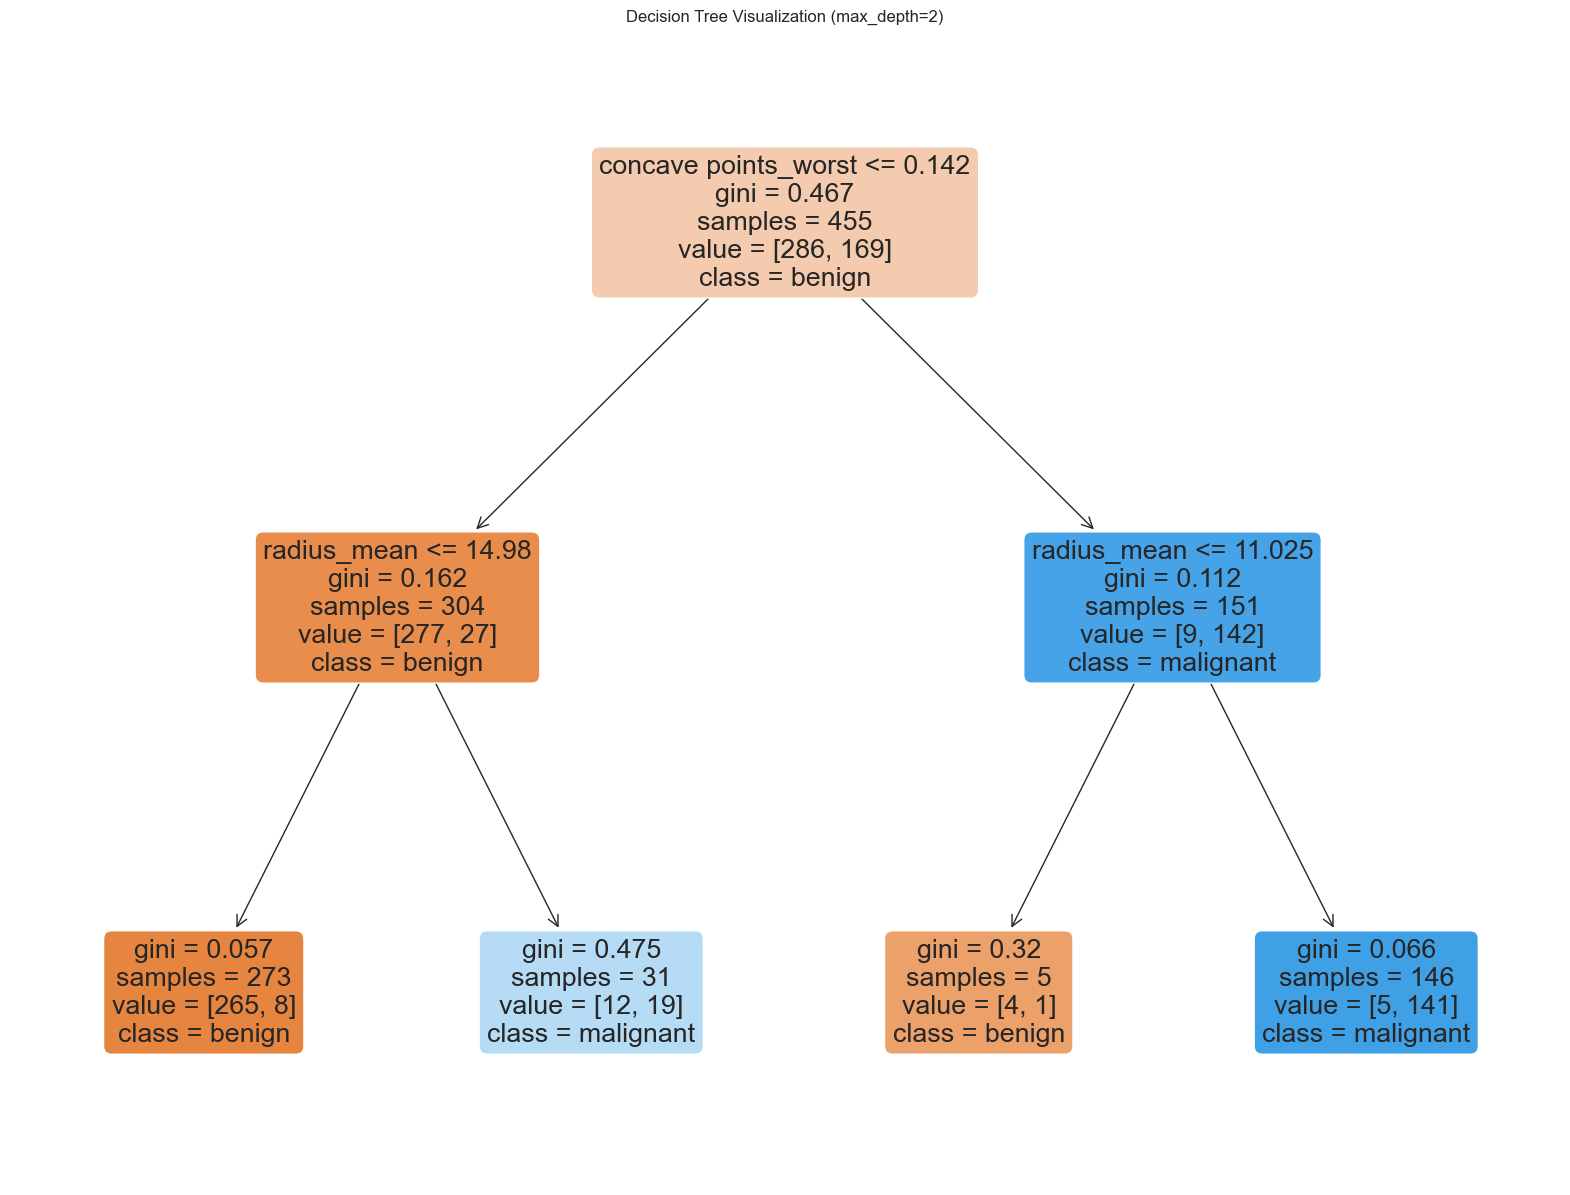

In [21]:
mod_dt = DecisionTreeClassifier(max_depth=2, random_state=1)
mod_dt.fit(X_train, y_train)
prediction = mod_dt.predict(X_test)

# Plotting the decision tree
plt.figure(figsize=(20, 15))
fn_list = list(X_train.columns)  # convert feature names menjadi list
cn = ["benign", "malignant"]  # class names
plot_tree(mod_dt, feature_names=fn_list, class_names=cn, filled=True, rounded=True)
plt.title("Decision Tree Visualization (max_depth=2)")
plt.show()

In [22]:
accuracy_dt = metrics.accuracy_score(prediction, y_test)

accuracy_dt

0.9385964912280702

In [23]:
# Melakukan feature importances
feature_importances = mod_dt.feature_importances_
feature_importances

array([0.       , 0.1440859, 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.8559141, 0.       , 0.       ])

In [24]:
report = classification_report(y_test, prediction)
report

'              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95        71\n           1       0.91      0.93      0.92        43\n\n    accuracy                           0.94       114\n   macro avg       0.93      0.94      0.93       114\nweighted avg       0.94      0.94      0.94       114\n'

In [25]:
conf_matrix = confusion_matrix(y_test, prediction)
conf_matrix

array([[67,  4],
       [ 3, 40]], dtype=int64)

In [26]:
# 10-fold cross-validation
cv_scores = cross_val_score(mod_dt, X, y, cv=10, scoring="accuracy")

# Perhitungan mean and STD dari cross-validation
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std

(0.9297305764411027, 0.03996591347382777)

### 5. Kesimpulan


1. Didapatkan max-depth yang optimal di angka 2/3 untuk menghindari overfitting/underfitting
2. Didapatkan 93% accuracy score dari model tersebut
3. Pada confussion metrix, 71 kasus adalah benign, dan model memprediksi 67 dengan benar dan 4 salah. 43 kasus adalah malignant, dan model memprediksi 40 dengan benar dan 3 salah.
